# Dataset 2 - Small Dataset

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# loading both dataset
dataset2_url = "https://raw.githubusercontent.com/hbedros/data622-assignment1/refs/heads/main/data/dataset-2.csv"

dataset2 = pd.read_csv(dataset2_url)

print(dataset2.head())


   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0          65             86             67               78            2021
1          64             85             71               80            2019
2          76             77             77               84            2021
3          80             76             75               75            2021
4          63             91             62               90            2019


In [2]:
club_join_freq = dataset2['Club_Join_Date'].value_counts()
club_join_freq = pd.DataFrame(club_join_freq)
club_join_freq = club_join_freq.reset_index()
club_join_freq.columns = ['Join Date', 'Frequency']
display(club_join_freq)


,Join Date,Frequency
0,2019,102
1,2018,101
2,2020,99
3,2021,97


The distribution of individuals who joined the club throughout the years is rather equivalent, with the highest frequency of enrollments being in 2019.

,Club_Join_Date,Math_Score_mean,Reading_Score_mean,Writing_Score_mean,Placement_Score_mean
0,2018,79.168317,80.267327,79.396040,80.128713
1,2019,78.941176,80.088235,79.931373,80.254902
2,2020,79.262626,80.949495,78.878788,81.494949
3,2021,79.371134,77.350515,78.422680,79.494845


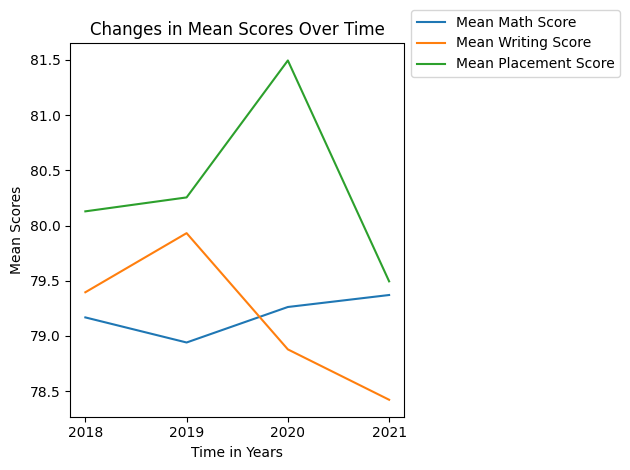

In [7]:
dataset2 = dataset2.sort_values(by = ['Club_Join_Date'])

Means = dataset2.groupby(['Club_Join_Date']).agg(['mean'])
Means.columns = ['_'.join(col).strip() for col in Means.columns]

Means = Means.reset_index()

display(Means)

fig, ax = plt.subplots()

ax.plot(Means['Club_Join_Date'], Means['Math_Score_mean'], label = "Mean Math Score")
ax.plot(Means['Club_Join_Date'], Means['Writing_Score_mean'], label = "Mean Writing Score")
ax.plot(Means['Club_Join_Date'], Means['Placement_Score_mean'], label = "Mean Placement Score")

ax.set_xticks(Means['Club_Join_Date'])

plt.xlabel('Time in Years')
plt.ylabel('Mean Scores')
plt.title('Changes in Mean Scores Over Time')
plt.legend(bbox_to_anchor=(1,1), loc = 'center left')
plt.tight_layout()

plt.show()

We can see that average scores are rather consistent throughout the years and they tend to fluctuate between 79 through 81. Interestingly, writing and placement scores appear to decrease quite a bit in 2021.

                 Math_Score  Reading_Score  Writing_Score  Placement_Score  \
Math_Score         1.000000      -0.073645       0.130120         0.022948   
Reading_Score     -0.073645       1.000000      -0.005636         0.093149   
Writing_Score      0.130120      -0.005636       1.000000         0.010894   
Placement_Score    0.022948       0.093149       0.010894         1.000000   
Club_Join_Date     0.008700      -0.076759      -0.036702        -0.005781   

                 Club_Join_Date  
Math_Score             0.008700  
Reading_Score         -0.076759  
Writing_Score         -0.036702  
Placement_Score       -0.005781  
Club_Join_Date         1.000000  


<Axes: >

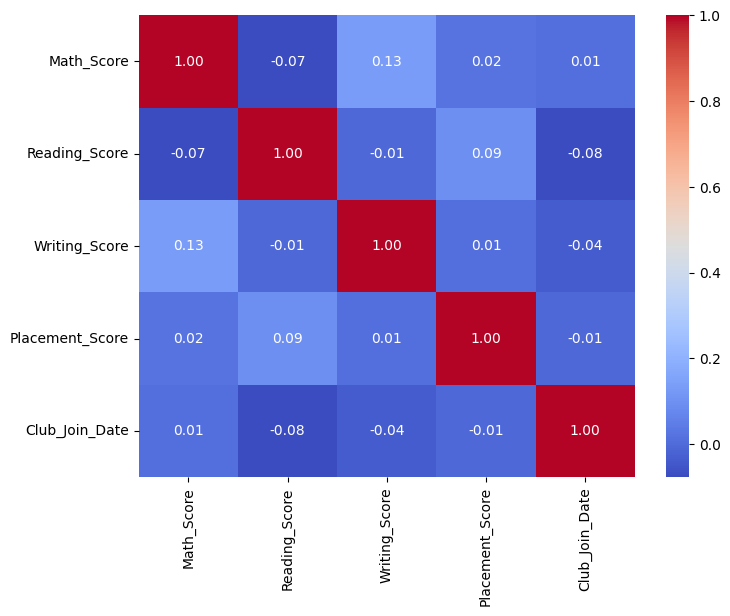

In [8]:
data_2018 = dataset2[dataset2['Club_Join_Date'] == 2018]

data2corr = dataset2.corr(method = 'pearson')

print(data2corr)

plt.figure(figsize=(8, 6))
sns.heatmap(data2corr, annot=True, cmap='coolwarm', fmt='.2f')

The variables present are not particularly correlated with each other, interestingly enough. The strongest relationships seen are between math score and writing score (r = 0.13), as well as club join date and reading date (r = -0.08). However, these relationshiops are rather weak and suggest a high degree of variance across scores and across years.

<function matplotlib.pyplot.show(close=None, block=None)>

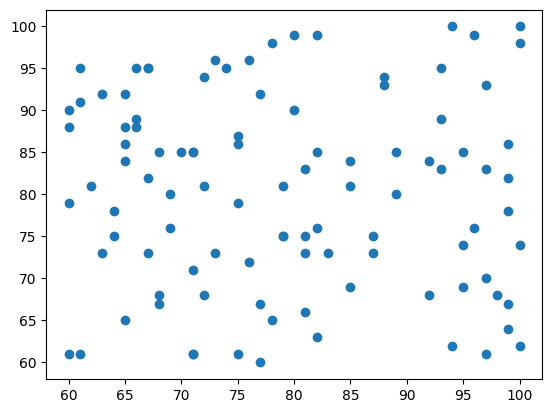

In [9]:
data_2018 = dataset2[dataset2['Club_Join_Date'] == 2018]
plt.scatter(data_2018['Math_Score'], data_2018['Reading_Score'])
plt.show

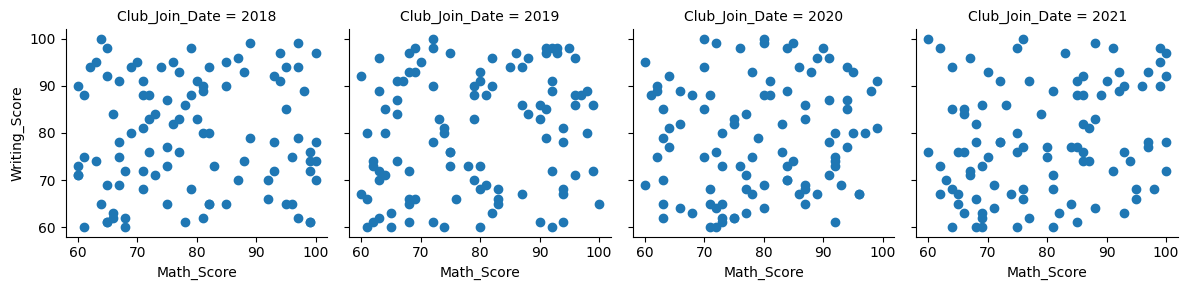

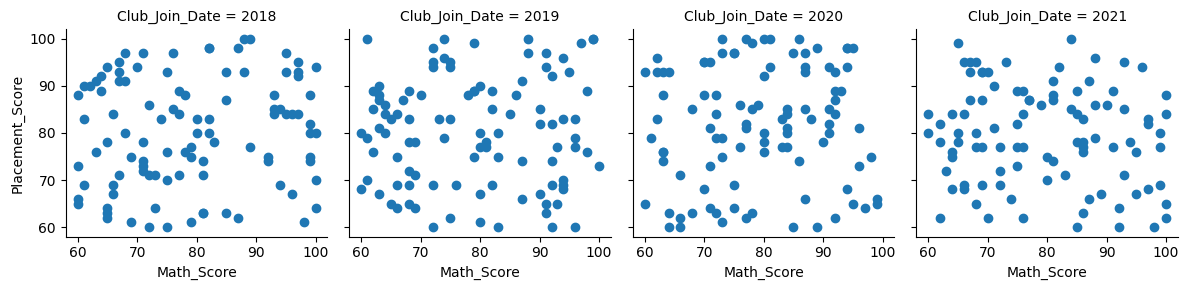

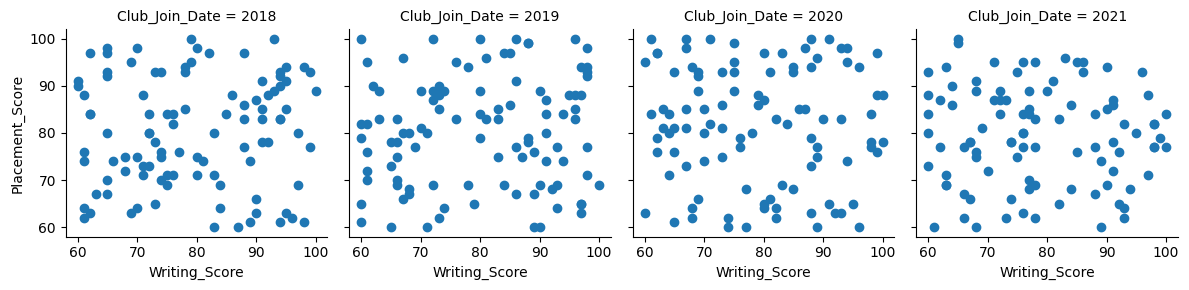

In [10]:
g1 = sns.FacetGrid(dataset2, col="Club_Join_Date")
g1.map(plt.scatter, 'Math_Score', 'Writing_Score')

g2 = sns.FacetGrid(dataset2, col="Club_Join_Date")
g2.map(plt.scatter, 'Math_Score', 'Placement_Score')

g3 = sns.FacetGrid(dataset2, col="Club_Join_Date")
g3.map(plt.scatter, 'Writing_Score', 'Placement_Score')

plt.show()

As we can see, these variables are not correlated, even within the same years.

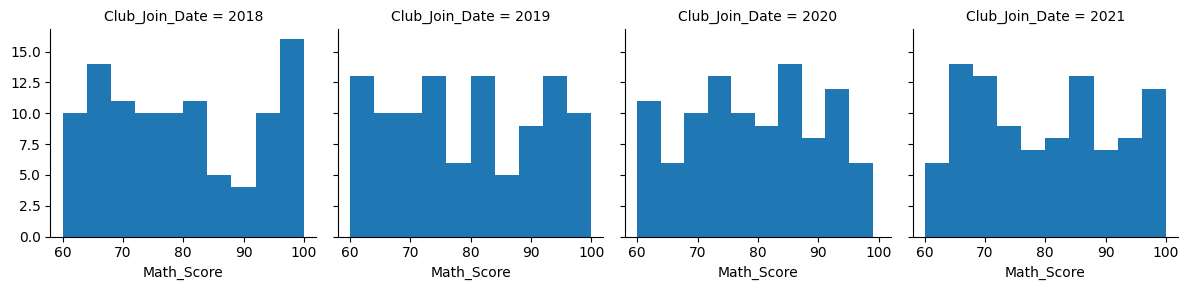

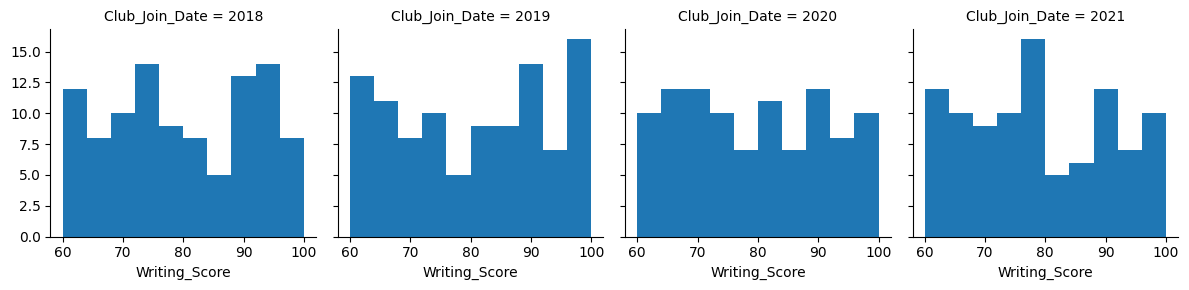

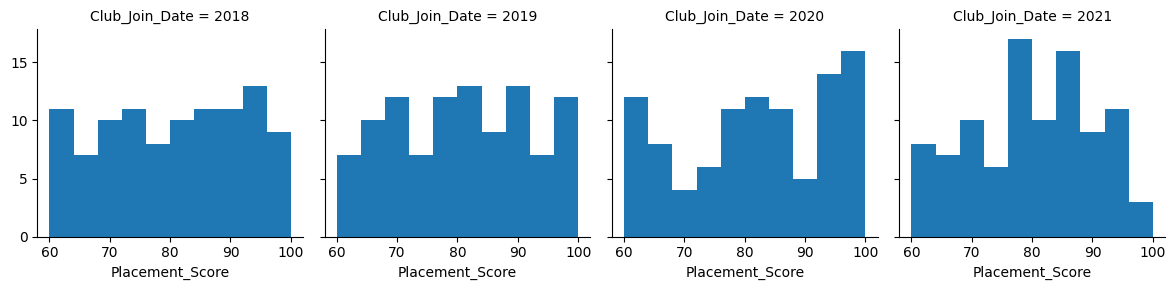

In [11]:
h1 = sns.FacetGrid(dataset2, col='Club_Join_Date') 
h1.map(plt.hist, 'Math_Score')

h2 = sns.FacetGrid(dataset2, col='Club_Join_Date') 
h2.map(plt.hist, 'Writing_Score')

h3 = sns.FacetGrid(dataset2, col='Club_Join_Date') 
h3.map(plt.hist, 'Placement_Score')

plt.show()

Across years, the variables are not normally distributed, so the use of parametric models may be limited.